In [1]:
import signalnet as sn
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
look_back = 10

In [3]:
df = pd.read_csv("data/digital_training_data.csv")
df = df.loc[:500000,:]
scaler = StandardScaler()

df["pre_filter"] = scaler.fit_transform(df["pre_filter"].to_numpy().reshape(-1,1))

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [5]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_ann(X_train, X_test, y_train, y_test, window=5)

In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(128, input_shape=(5,1)))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(32, activation="tanh"))
model.add(keras.layers.Dense(1))

In [8]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 107,841
Trainable params: 107,841
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25


2023-05-01 17:44:28.465720: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7813/7813 [==============================] - 27s 3ms/step - loss: 3.0167e-04
Epoch 2/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.6806e-04
Epoch 3/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.5689e-04
Epoch 4/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.5284e-04
Epoch 5/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.4942e-04
Epoch 6/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.4713e-04
Epoch 7/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.4537e-04
Epoch 8/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.4406e-04
Epoch 9/25
7813/7813 [==============================] - 26s 3ms/step - loss: 2.4052e-04
Epoch 10/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.4243e-04
Epoch 11/25
7813/7813 [==============================] - 25s 3ms/step - loss: 2.3937e-04
Epoch 12/25
7813/7813 [==================

In [11]:
import matplotlib.pyplot as plt

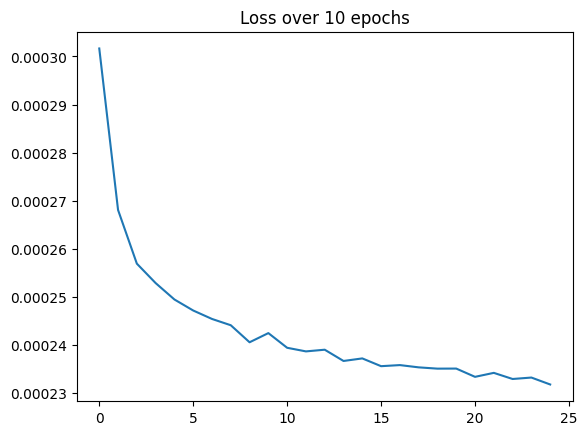

In [12]:
plt.plot(history.history["loss"])
plt.title("Loss over 10 epochs")
plt.show()

7813/7813 [==============================] - 8s 1ms/step


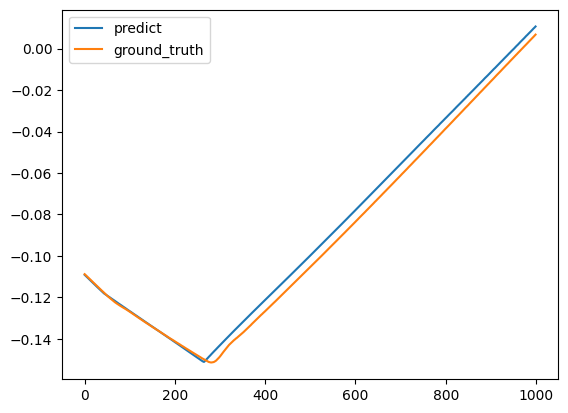

In [15]:
predictions = model.predict(X_test)

plt.plot(predictions[3000:4000], label="predict")
plt.plot(y_test[3000:4000], label="ground_truth")
# plt.plot(X_test[2000:12000,-1], label="ground_truth")
plt.legend()
plt.show()